# Unsupervised Learning Project: Countries

Purpose: Unsupervised modeling of numerical features from a Countries dataset.

Author: Jordan A. Caraballo-Vega

Version: 2024.03.06

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls drive/MyDrive/Terminal34/

 animales		        nasa-api.txt
 asteroid-time-series	        puerto-rico-dataset.zip
 Cleaned_DS_Jobs.csv	       'QuickFacts Feb-20-2020.csv'
 climate-change_pri.csv         science-and-technology_pri.csv
 Country-data.csv	        Uncleaned_DS_jobs.csv
 data-science-job-posting.zip   unit_1_feature_engineering_exercise_data.csv
 Incidencia_Crime_Map.csv       unit_1_feature_engineering_exercise_data.csv.zip
 Mall_Customers.csv


In [4]:
country_df = pd.read_csv('drive/MyDrive/Terminal34/Country-data.csv')
country_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## EDA

In [10]:
country_df.shape

(167, 10)

In [9]:
country_df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [11]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


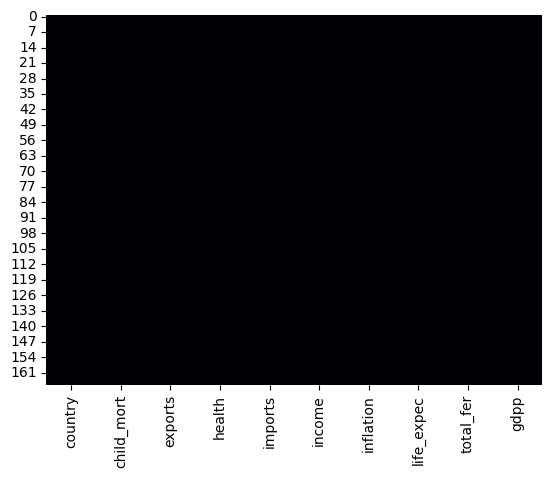

In [13]:
sns.heatmap(country_df.isnull(),cmap = 'magma',cbar = False);

In [14]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


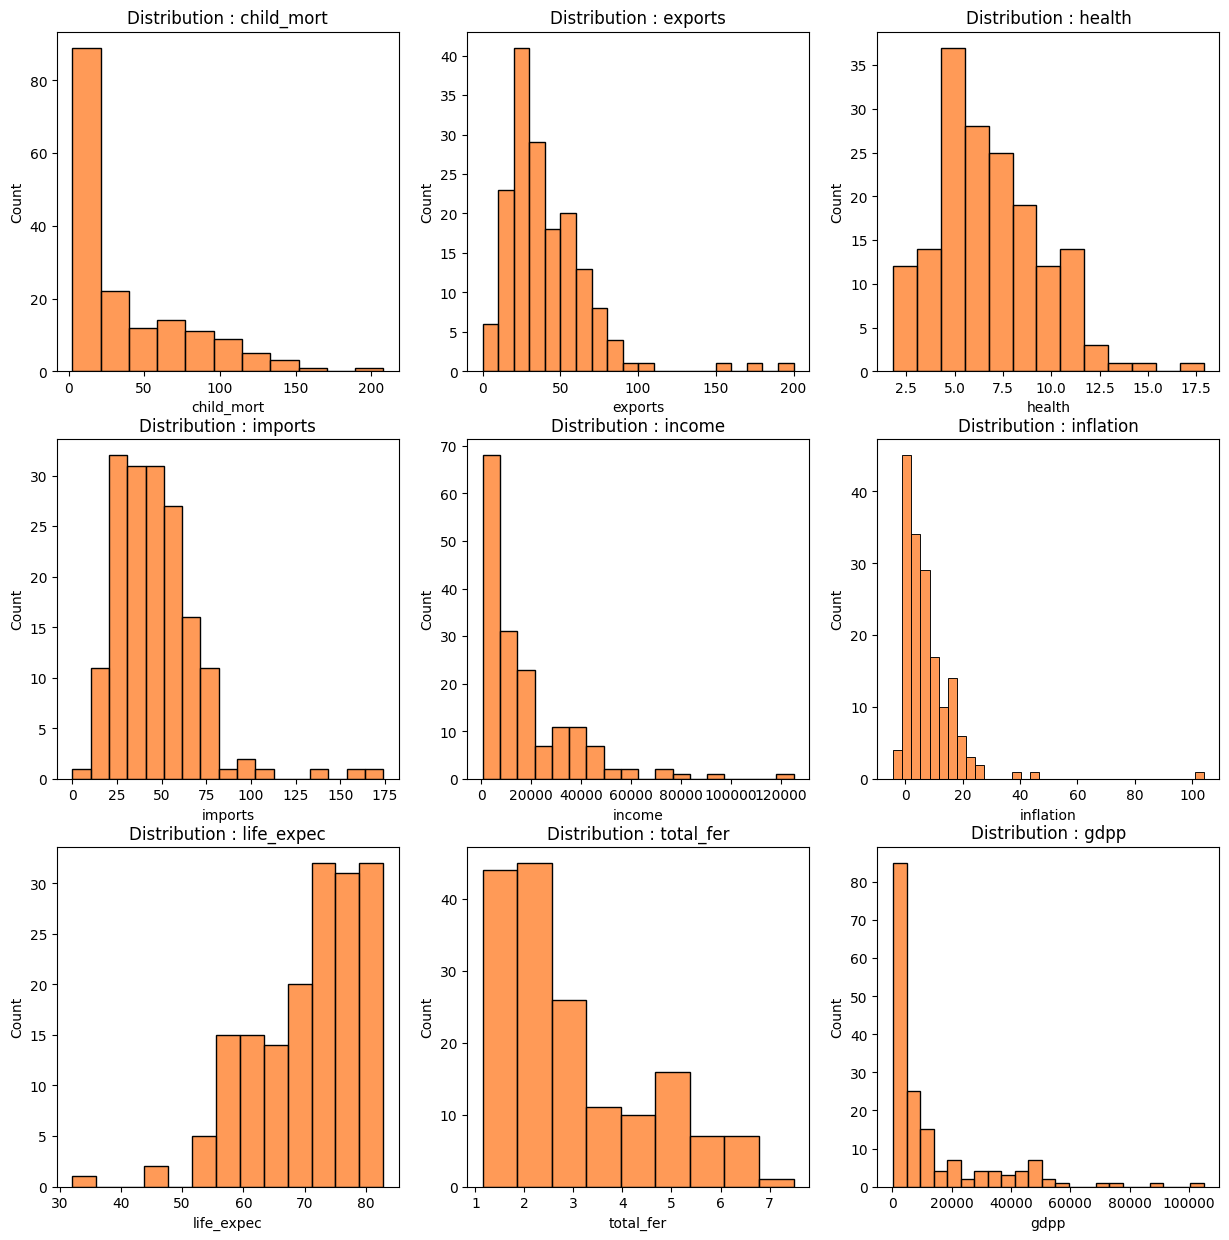

In [22]:
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))

numerical_features = list(country_df.columns)
numerical_features.remove('country') # country is not numerical
for i in range(len(numerical_features)):
    plt.subplot(3, 3, i+1)
    sns.histplot(country_df[numerical_features[i]], color='#FF781F')
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

<ipython-input-26-90a77498914d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-26-90a77498914d>:5: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(
<ipython-input-26-90a77498914d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='country', y='child_mort', data=country_df.sort_values(ascending=False, by='child_mort').iloc[81:86],
<ipython-input-26-90a77498914d>:14: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='country', y='child_mort', data=country_df.sort_values

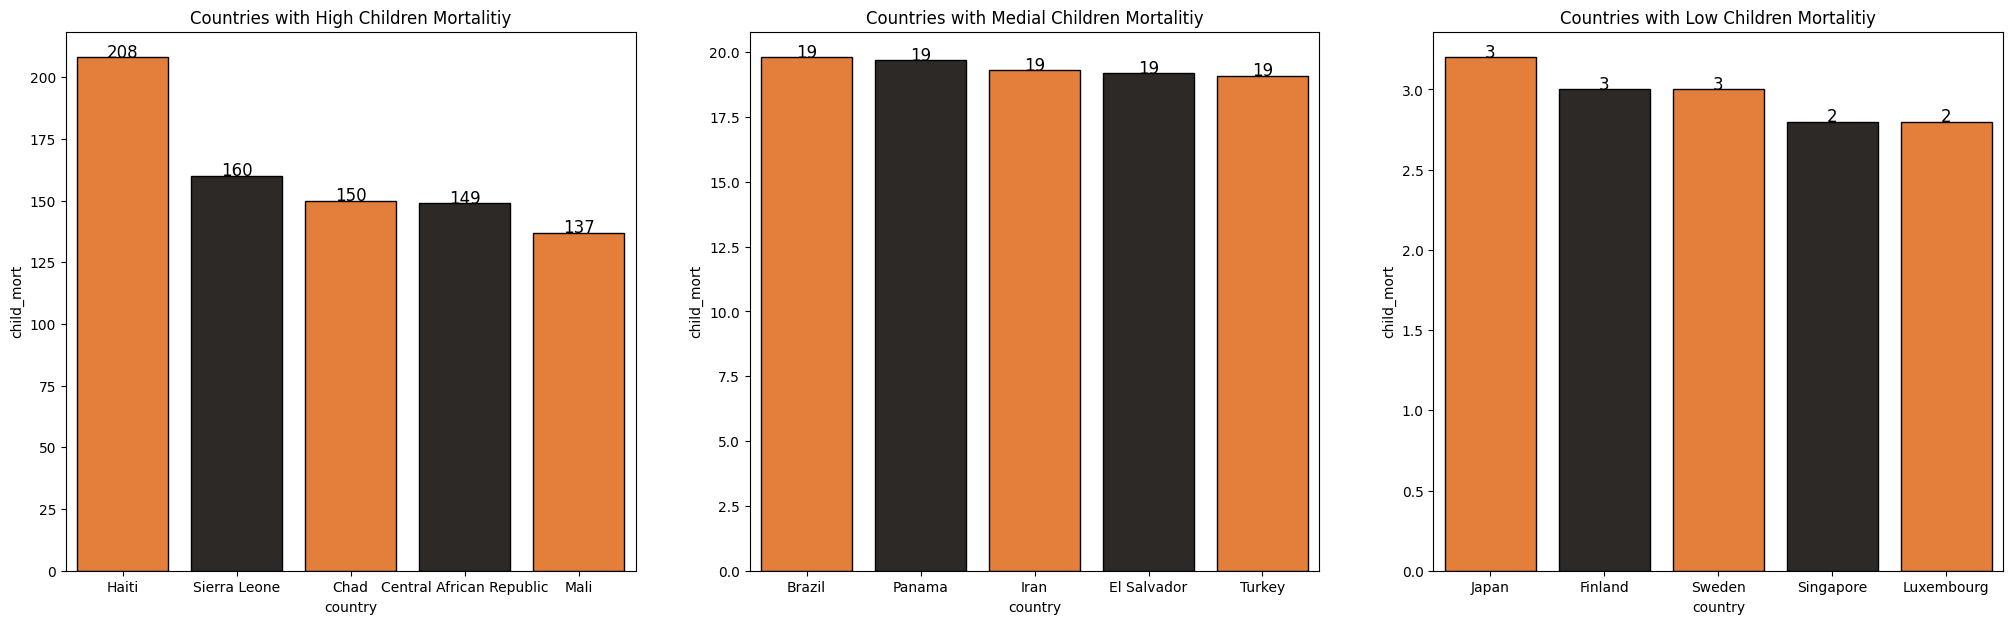

In [26]:
fig = plt.subplots(nrows=1, ncols=3, figsize=(25,7))
colors = ['#FF781F','#2D2926']

plt.subplot(1, 3, 1)
ax = sns.barplot(
    x='country', y='child_mort', data=country_df.sort_values(ascending=False, by='child_mort').iloc[:5],
    palette=colors, edgecolor='black');
plt.title('Countries with High Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize = 12)

plt.subplot(1, 3, 2)
ax = sns.barplot(x='country', y='child_mort', data=country_df.sort_values(ascending=False, by='child_mort').iloc[81:86],
                 palette=colors, edgecolor='black');
plt.title('Countries with Medial Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize=12)

plt.subplot(1, 3, 3)
ax = sns.barplot(x='country', y='child_mort', data=country_df.sort_values(ascending=False, by='child_mort').iloc[161:166],
                 palette=colors, edgecolor='black');
plt.title('Countries with Low Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
            horizontalalignment='center', fontsize=12)
plt.show()


In [32]:
def high_med_low(country_df, column='child_mort'):
    fig = plt.subplots(nrows=1, ncols=3, figsize=(25,7))
    colors = ['#FF781F','#2D2926']

    plt.subplot(1, 3, 1)
    ax = sns.barplot(
        x='country', y=column, data=country_df.sort_values(ascending=False, by=column).iloc[:5],
        palette=colors, edgecolor='black');
    plt.title(f'Countries with High {column}')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
                horizontalalignment='center', fontsize = 12)

    plt.subplot(1, 3, 2)
    ax = sns.barplot(x='country', y=column, data=country_df.sort_values(ascending=False, by=column).iloc[81:86],
                    palette=colors, edgecolor='black');
    plt.title(f'Countries with Medial {column}')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
                horizontalalignment='center', fontsize=12)

    plt.subplot(1, 3, 3)
    ax = sns.barplot(x='country', y=column, data=country_df.sort_values(ascending=False, by=column).iloc[161:166],
                    palette=colors, edgecolor='black');
    plt.title(f'Countries with Low {column}')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
                horizontalalignment='center', fontsize=12)
    plt.show()

<ipython-input-32-c04d87ef0289>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-32-c04d87ef0289>:6: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(
<ipython-input-32-c04d87ef0289>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='country', y=column, data=country_df.sort_values(ascending=False, by=column).iloc[81:86],
<ipython-input-32-c04d87ef0289>:15: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='country', y=column, data=country_df.sort_values(ascending=False, 

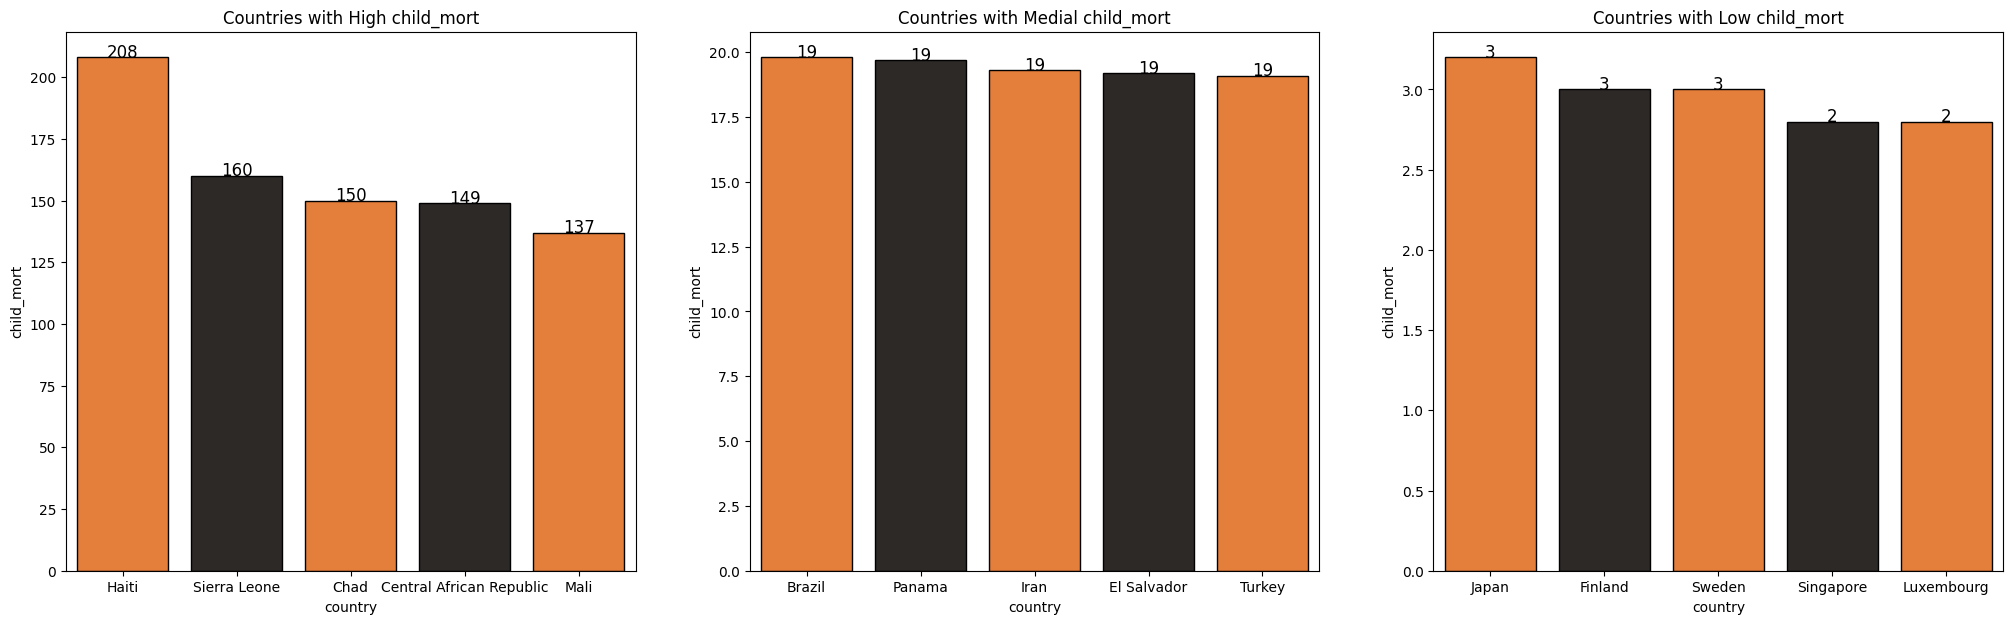

In [33]:
high_med_low(country_df, column='child_mort')

<ipython-input-32-c04d87ef0289>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-32-c04d87ef0289>:6: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(
<ipython-input-32-c04d87ef0289>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='country', y=column, data=country_df.sort_values(ascending=False, by=column).iloc[81:86],
<ipython-input-32-c04d87ef0289>:15: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='country', y=column, data=country_df.sort_values(ascending=False, 

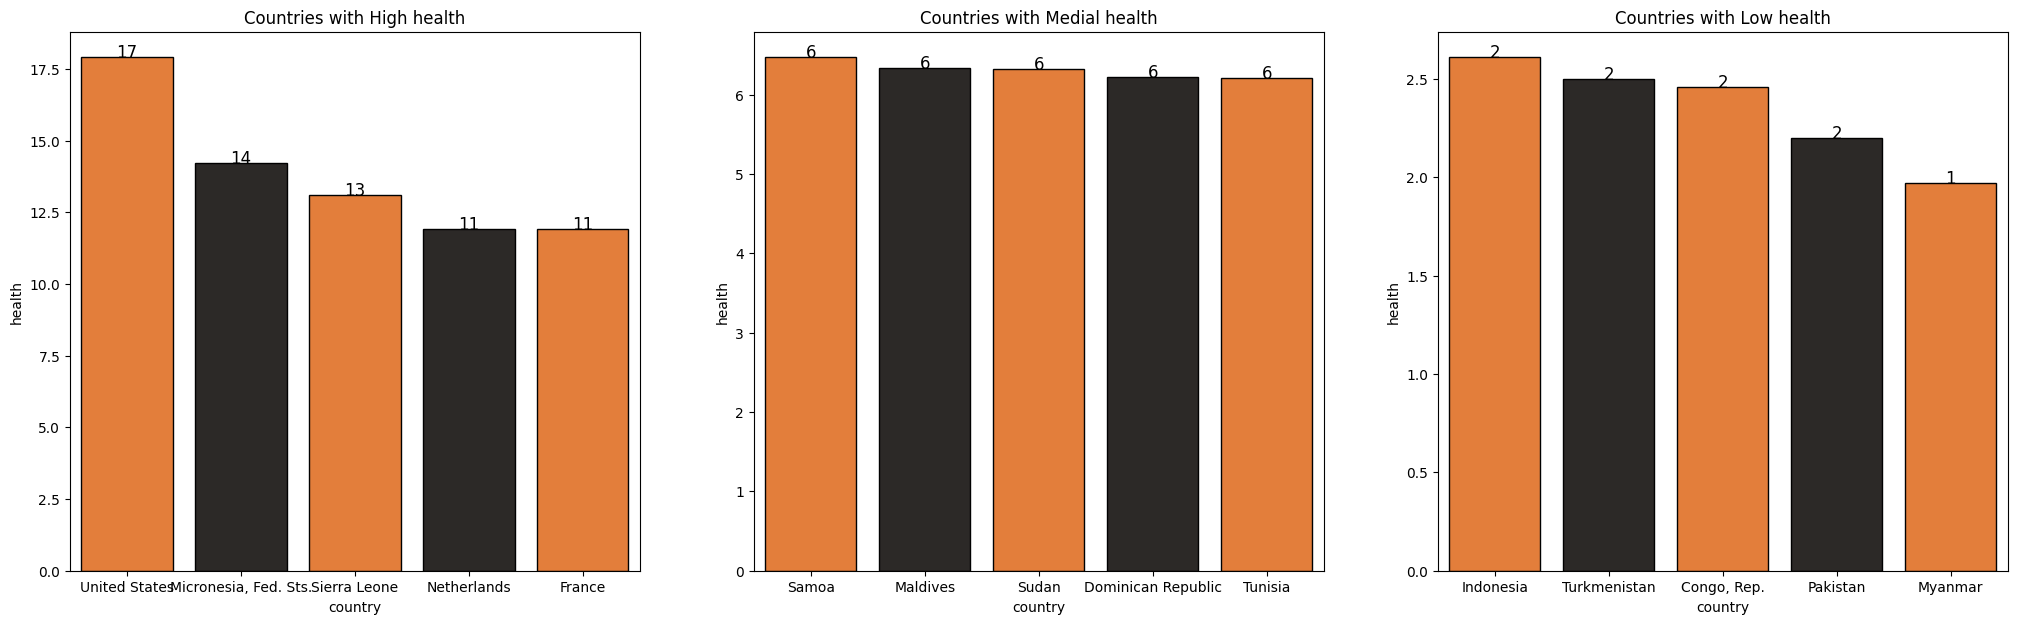

In [34]:
high_med_low(country_df, column='health')

<ipython-input-32-c04d87ef0289>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-32-c04d87ef0289>:6: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(
<ipython-input-32-c04d87ef0289>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='country', y=column, data=country_df.sort_values(ascending=False, by=column).iloc[81:86],
<ipython-input-32-c04d87ef0289>:15: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='country', y=column, data=country_df.sort_values(ascending=False, 

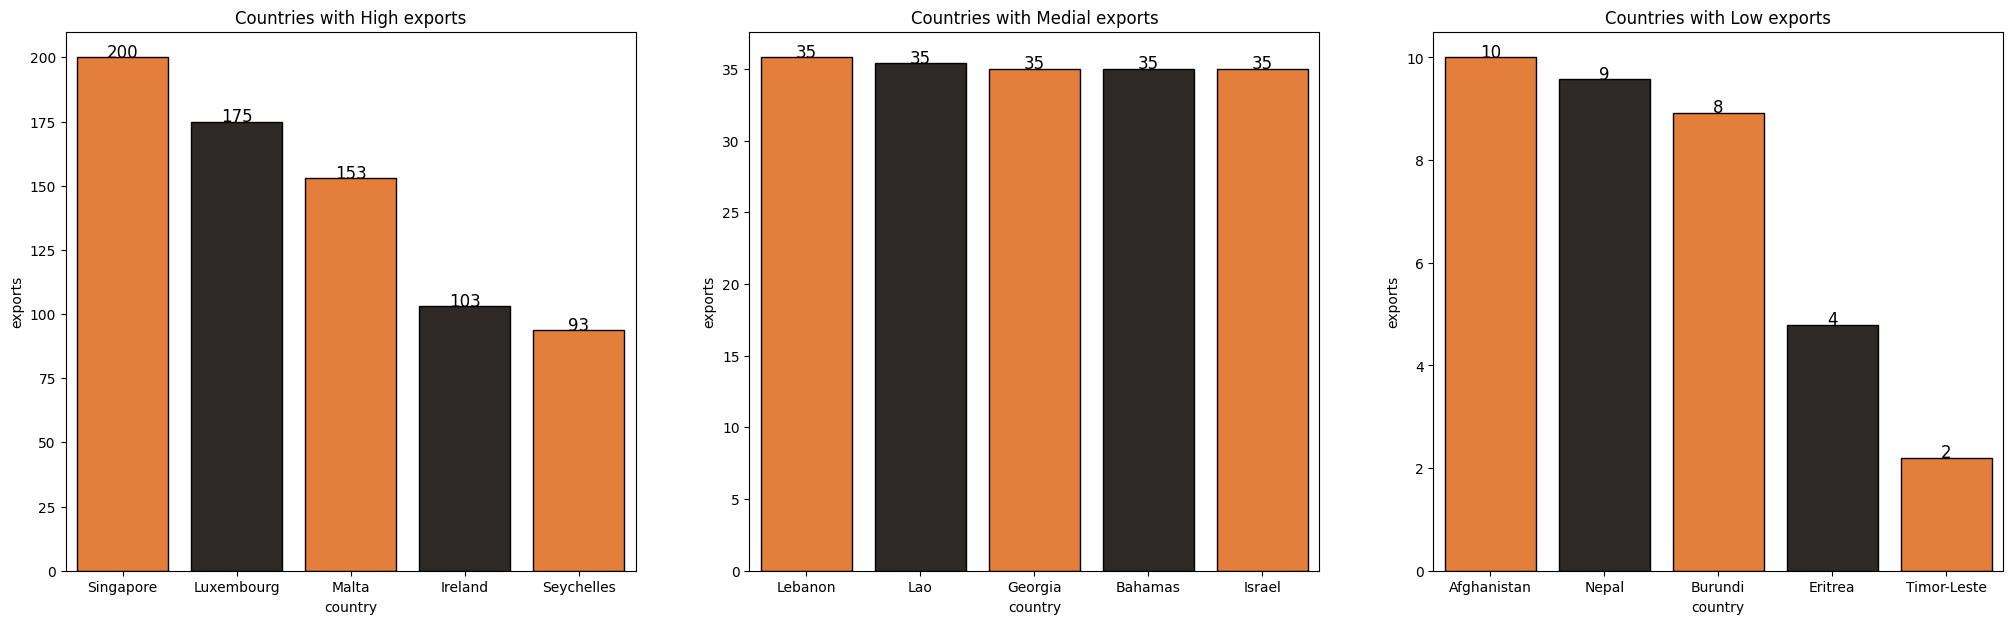

In [35]:
high_med_low(country_df, column='exports')

<ipython-input-32-c04d87ef0289>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-32-c04d87ef0289>:6: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(
<ipython-input-32-c04d87ef0289>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='country', y=column, data=country_df.sort_values(ascending=False, by=column).iloc[81:86],
<ipython-input-32-c04d87ef0289>:15: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='country', y=column, data=country_df.sort_values(ascending=False, 

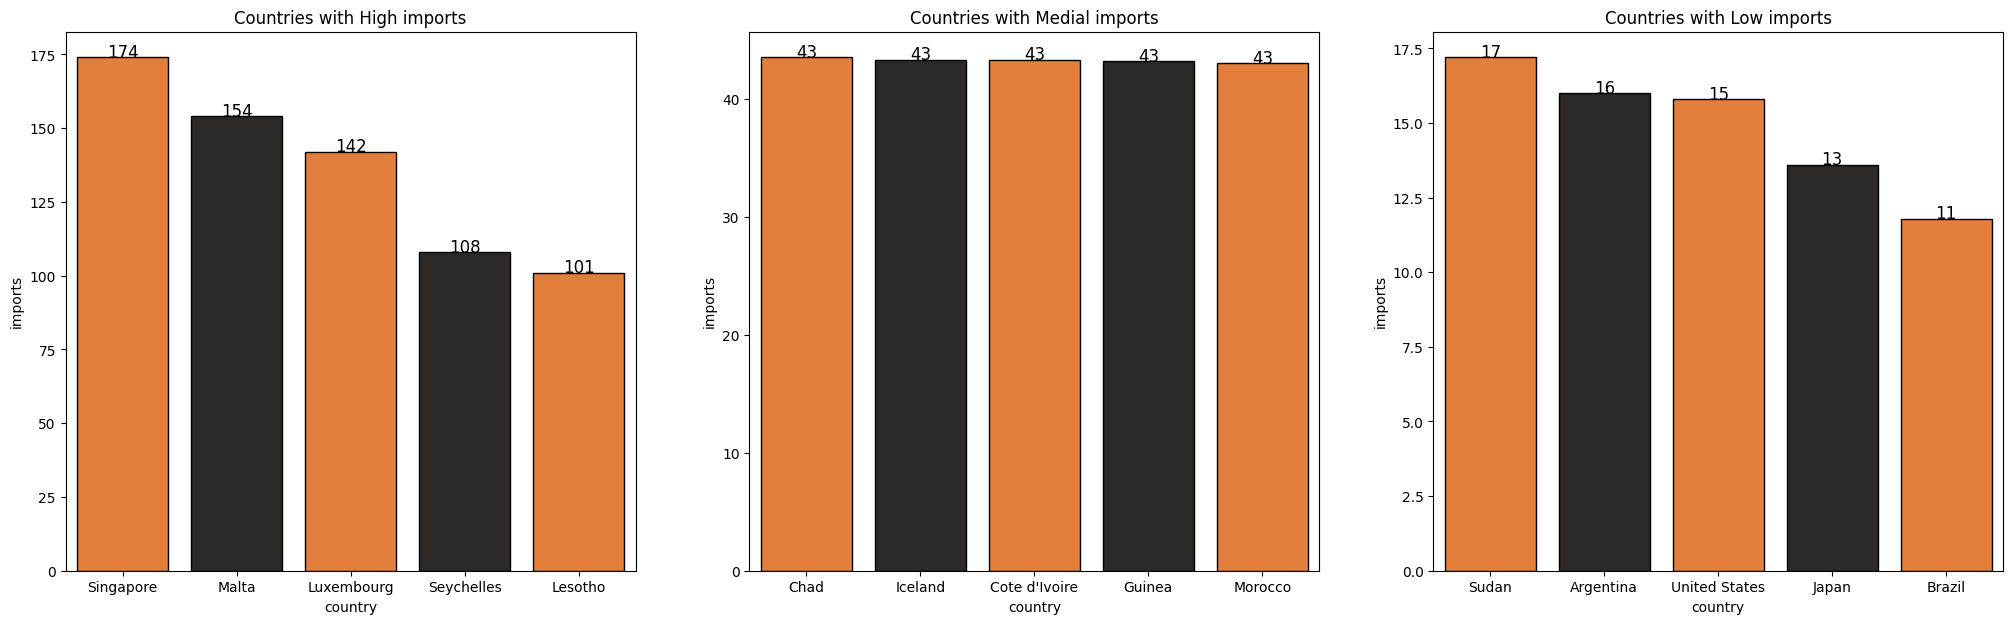

In [36]:
high_med_low(country_df, column='imports')

<ipython-input-32-c04d87ef0289>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-32-c04d87ef0289>:6: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(
<ipython-input-32-c04d87ef0289>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='country', y=column, data=country_df.sort_values(ascending=False, by=column).iloc[81:86],
<ipython-input-32-c04d87ef0289>:15: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='country', y=column, data=country_df.sort_values(ascending=False, 

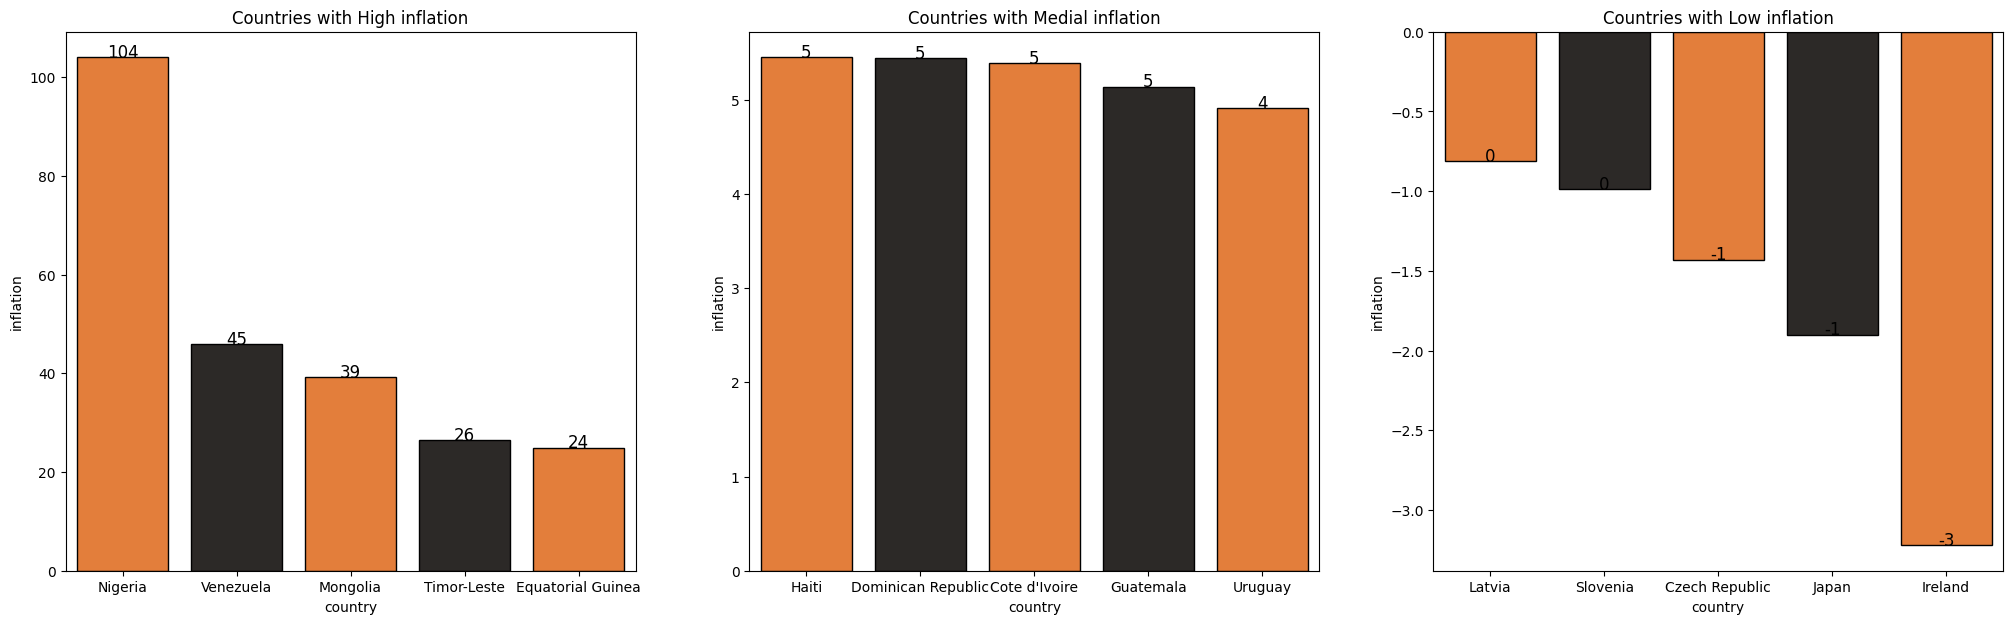

In [37]:
high_med_low(country_df, column='inflation')

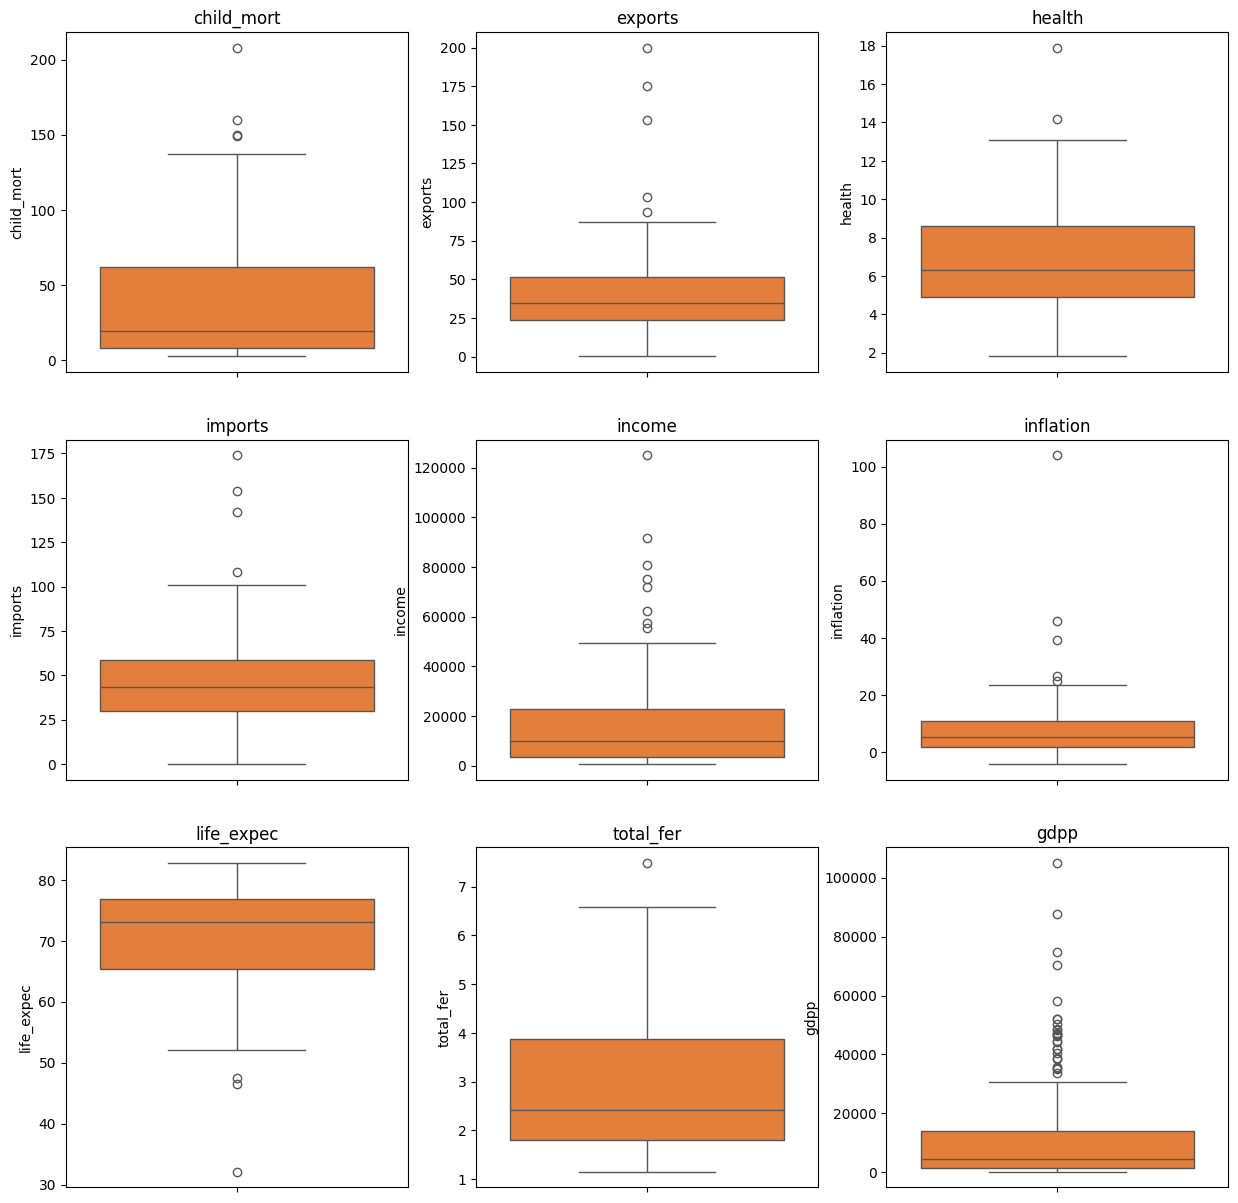

In [39]:
fig  = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
for i in range(len(numerical_features)):
    plt.subplot(3, 3, i + 1)
    ax = sns.boxplot(country_df[numerical_features[i]], color=colors[0])
    plt.title(numerical_features[i])
plt.show()

<ipython-input-41-22f5a3e16e0b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ut = np.triu(country_df.corr())
<ipython-input-41-22f5a3e16e0b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lt = np.tril(country_df.corr())
<ipython-input-41-22f5a3e16e0b>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(country_df.corr(), cmap=colors, annot=True, cbar='True', mask=ut);
<ipython-input-41-22f5a3e16e0b>:10: FutureWarning: The default value of numeric_only in DataFra

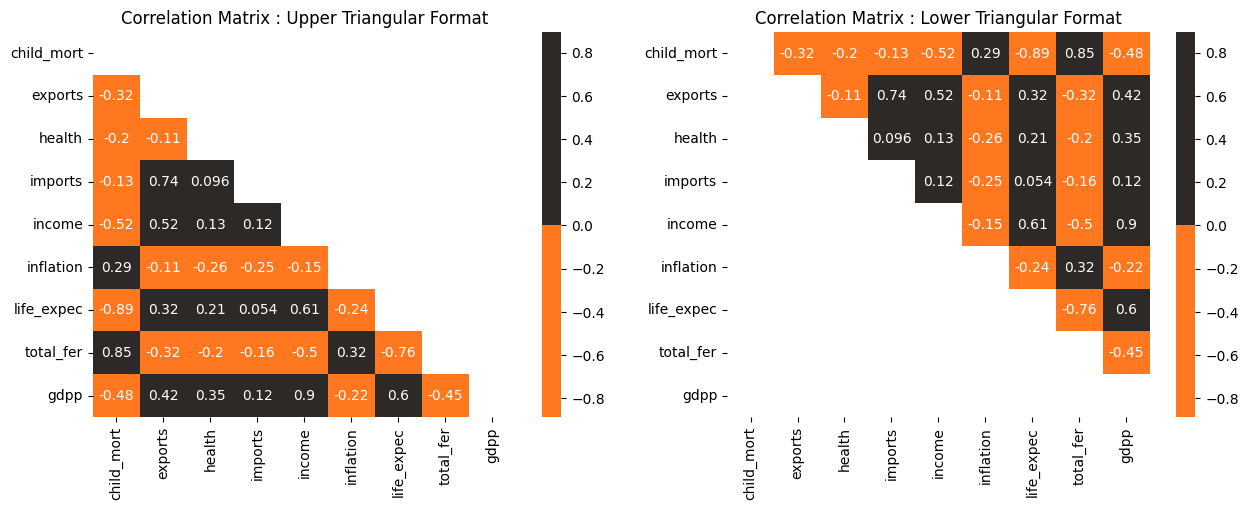

In [41]:
ut = np.triu(country_df.corr())
lt = np.tril(country_df.corr())

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(country_df.corr(), cmap=colors, annot=True, cbar='True', mask=ut);
plt.title('Correlation Matrix : Upper Triangular Format');

plt.subplot(1, 2, 2)
sns.heatmap(country_df.corr(), cmap=colors, annot=True, cbar='True', mask=lt);
plt.title('Correlation Matrix : Lower Triangular Format');

## K-Means Classification

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

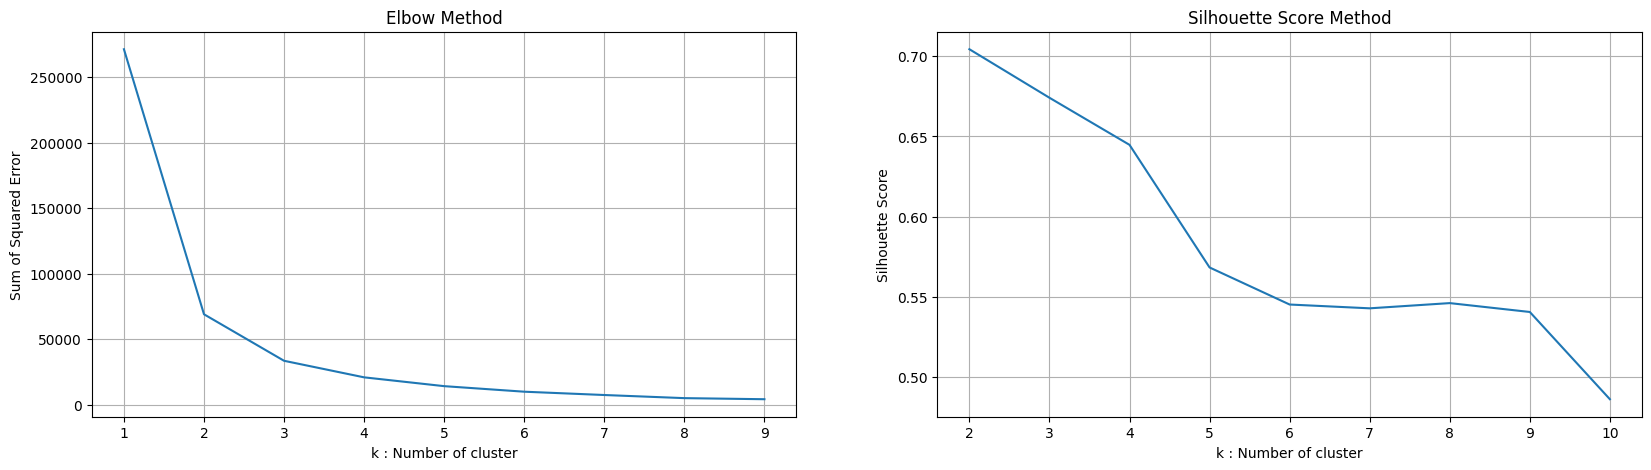

In [43]:
sse = {}
sil = []
kmax = 10
X = country_df[['child_mort', 'health']].values
fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Elbow Method :
plt.subplot(1, 2, 1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

In [44]:
kmeans = KMeans(n_clusters=3, max_iter=1000).fit(X)
labels = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


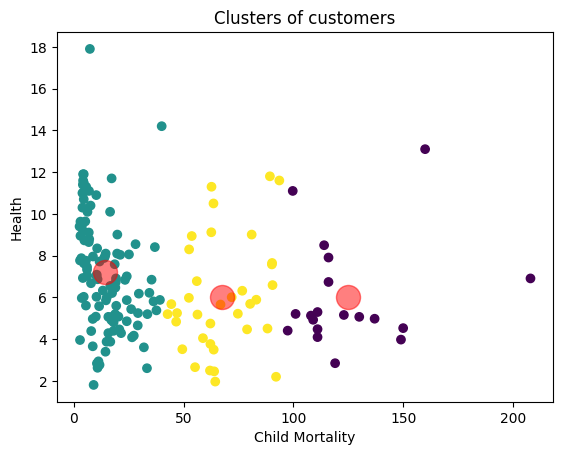

In [45]:
centroids = kmeans.cluster_centers_

plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', alpha=0.5)
plt.title('Clusters of customers')
plt.xlabel('Child Mortality')
plt.ylabel('Health')
plt.show()

In [46]:
country_df_clustered = country_df.copy()
country_df_clustered['label'] = labels

Text(0.5, 1.0, 'child_mort vs label')

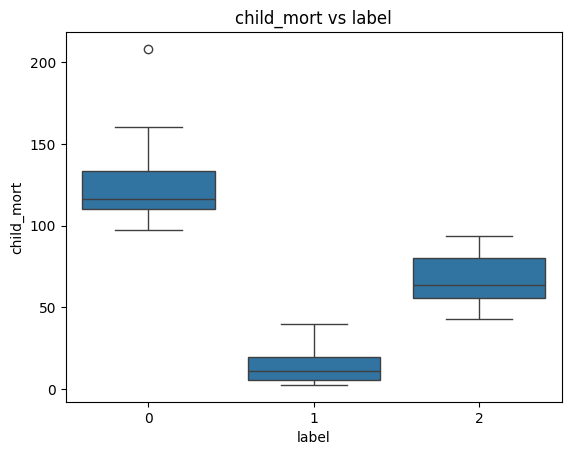

In [47]:
sns.boxplot(x='label', y='child_mort', data=country_df_clustered);
plt.title('child_mort vs label')

In [48]:
import plotly.express as px
!pip install -U kaleido
import kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.5 MB/s eta 0:00:00


In [51]:
country_df_clustered['label'].loc[country_df_clustered['label'] == 0] = 'Help Needed'
country_df_clustered['label'].loc[country_df_clustered['label'] == 1] = 'No Help Needed'
country_df_clustered['label'].loc[country_df_clustered['label'] == 2] = 'Might Need Help'

fig = px.choropleth(country_df_clustered[['country','label']],
                    locationmode='country names',
                    locations='country',
                    title='Needed Help Per Country (World)',
                    color=country_df_clustered['label'],
                    color_discrete_map={'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(legend_title_text='Labels', legend_title_side='top', title_pad_l=260, title_y=0.86)
fig.show(engine='kaleido')

<ipython-input-51-fd155cb7b729>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df_clustered['label'].loc[country_df_clustered['label'] == 0] = 'Help Needed'
<ipython-input-51-fd155cb7b729>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df_clustered['label'].loc[country_df_clustered['label'] == 1] = 'No Help Needed'
<ipython-input-51-fd155cb7b729>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df_clustered[